In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
data_customers = pd.read_csv("customers_final_lyst1748259916578.csv")
data_products = pd.read_csv("products_final_lyst1748259929977.csv ")
data_purchases = pd.read_csv("purchases_final_lyst1748259922609.csv")

In [22]:
data_customers.shape

(1000, 13)

In [23]:
data_customers.isnull().sum()

Unnamed: 0       0
id               0
first_name       0
last_name        0
email            0
gender           0
street_num       0
street_name      0
street_suffix    0
city             0
state            0
postcode         0
full_name        0
dtype: int64

In [24]:
data_customers.head(5)

,Unnamed: 0,id,first_name,last_name,email,gender,street_num,street_name,street_suffix,city,state,postcode,full_name
0,0,1,Romain,Southcott,rsouthcott0@clickbank.net,Male,1,Trailsway,Road,San Diego,California,92127,Romain Southcott
1,1,2,Cosimo,Molyneaux,cmolyneaux1@wiley.com,Male,1,Trailsway,Road,El Paso,Texas,78220,Cosimo Molyneaux
2,2,3,Bambi,Westrip,bwestrip2@symantec.com,Female,4057,Arkansas,Circle,San Antonio,Texas,78220,Bambi Westrip
3,3,4,Roarke,Pankettman,rpankettman3@wiley.com,Male,74,Debs,Point,Memphis,Tennessee,38150,Roarke Pankettman
4,4,5,Mikaela,Althorpe,malthorpe4@51.la,Male,74,2nd,Drive,Baltimore,Maryland,83732,Mikaela Althorpe


In [25]:
data_customers.drop(columns=['Unnamed: 0'], inplace=True)
data_customers.head()

,id,first_name,last_name,email,gender,street_num,street_name,street_suffix,city,state,postcode,full_name
0,1,Romain,Southcott,rsouthcott0@clickbank.net,Male,1,Trailsway,Road,San Diego,California,92127,Romain Southcott
1,2,Cosimo,Molyneaux,cmolyneaux1@wiley.com,Male,1,Trailsway,Road,El Paso,Texas,78220,Cosimo Molyneaux
2,3,Bambi,Westrip,bwestrip2@symantec.com,Female,4057,Arkansas,Circle,San Antonio,Texas,78220,Bambi Westrip
3,4,Roarke,Pankettman,rpankettman3@wiley.com,Male,74,Debs,Point,Memphis,Tennessee,38150,Roarke Pankettman
4,5,Mikaela,Althorpe,malthorpe4@51.la,Male,74,2nd,Drive,Baltimore,Maryland,83732,Mikaela Althorpe


In [26]:
data_customers.dtypes

id                int64
first_name       object
last_name        object
email            object
gender           object
street_num        int64
street_name      object
street_suffix    object
city             object
state            object
postcode          int64
full_name        object
dtype: object

In [27]:
data_customers['id'] = data_customers['id'].astype(object)

In [28]:
data_products.dtypes

Unnamed: 0      int64
id              int64
product        object
cost          float64
company        object
dtype: object

In [29]:
data_purchases.drop(columns=['Unnamed: 0'], inplace=True)
data_purchases.head()

,id,purch_date,customer_num,product_num,amount,paid
0,1,2019-01-03,823,27,12,568.92
1,2,2019-01-03,606,28,14,395.36
2,3,2019-01-03,955,9,17,510.17
3,4,2019-01-03,577,19,3,68.49
4,5,2019-01-03,429,8,18,759.42


In [30]:
data_products['id'] = data_products['id'].astype(object)

In [31]:
data_purchases.dtypes

id                int64
purch_date       object
customer_num      int64
product_num       int64
amount            int64
paid            float64
dtype: object

In [32]:
data_products.dtypes

Unnamed: 0      int64
id             object
product        object
cost          float64
company        object
dtype: object

In [33]:
data_products.drop(columns='Unnamed: 0', inplace=True)

In [34]:
data_products.dtypes

id          object
product     object
cost       float64
company     object
dtype: object

In [35]:
data_customers['id'] = data_customers['id'].astype(object)
data_purchases['id'] = data_purchases['id'].astype(object)
data_products['id'] = data_products['id'].astype(object)
data_customers['postcode'] = data_customers['postcode'].astype(object)
data_customers['street_num'] = data_customers['street_num'].astype(object)

In [36]:
data_products.head(20)

,id,product,cost,company
0,1,Liners - Baking Cups,6.36,Skipfire
1,2,Nori Sea Weed - Gold Label,85.74,Dynazzy
2,3,Bar Bran Honey Nut,65.40,Ntag
3,4,Soup - Campbells Beef Stew,68.16,Photojam
4,5,Wine - Shiraz Wolf Blass Premium,87.39,Eare
5,6,"Wine - White, Riesling, Semi - Dry",99.22,Livepath
6,7,Brandy - Bar,13.83,Oloo
7,8,Onions - White,42.19,Oozz
8,9,Lettuce - Baby Salad Greens,30.01,Meevee
9,10,Sambuca - Ramazzotti,88.99,Livepath


Average cost per company

In [41]:
avg_cost_per_company = data_products.groupby('company')['cost'].mean().reset_index()
avg_cost_per_company

,company,cost
0,Aibox,56.330
1,Babbleopia,63.980
2,Brainsphere,22.830
3,Browsezoom,41.050
4,Cogibox,51.135
5,Digitube,8.550
6,Dynabox,99.400
7,Dynazzy,85.740
8,Eare,87.390
9,Eazzy,74.280


In [42]:
type(avg_cost_per_company)

pandas.core.frame.DataFrame

In [43]:
avg_cost_per_company_v1 = data_products.groupby('company').agg({'cost': 'mean'})
avg_cost_per_company_v1

,cost
company,
Aibox,56.330
Babbleopia,63.980
Brainsphere,22.830
Browsezoom,41.050
Cogibox,51.135
Digitube,8.550
Dynabox,99.400
Dynazzy,85.740
Eare,87.390


In [44]:
type(avg_cost_per_company_v1)

pandas.core.frame.DataFrame

In [45]:
avg_cost_per_company_v1.head()

,cost
company,
Aibox,56.330
Babbleopia,63.980
Brainsphere,22.830
Browsezoom,41.050
Cogibox,51.135


In [46]:
avg_cost_per_company['company']

0            Aibox
1       Babbleopia
2      Brainsphere
3       Browsezoom
4          Cogibox
5         Digitube
6          Dynabox
7          Dynazzy
8             Eare
9            Eazzy
10        Edgeclub
11          Eimbee
12        Fanoodle
13       Flipstorm
14        Fliptune
15           Gevee
16         Innojam
17    Jabbersphere
18        Linkbuzz
19        Livepath
20           Meemm
21          Meevee
22          Meezzy
23            Muxo
24           Mynte
25            Ntag
26            Oloo
27           Oodoo
28            Oozz
29       Photofeed
30        Photojam
31       Photolist
32           Quatz
33           Quinu
34        Realcube
35       Realpoint
36           Skiba
37         Skinder
38        Skipfire
39          Skyble
40    Thoughtstorm
41     Topiclounge
42          Trunyx
43    Twitterworks
44         Unknown
45            Vitz
46         Voonder
47        Wordware
48          Yakijo
49           Zazio
50         Zoombox
Name: company, dtype: object

Create a bar plot where in x-axis we have company and in y-axis we have average cost per company

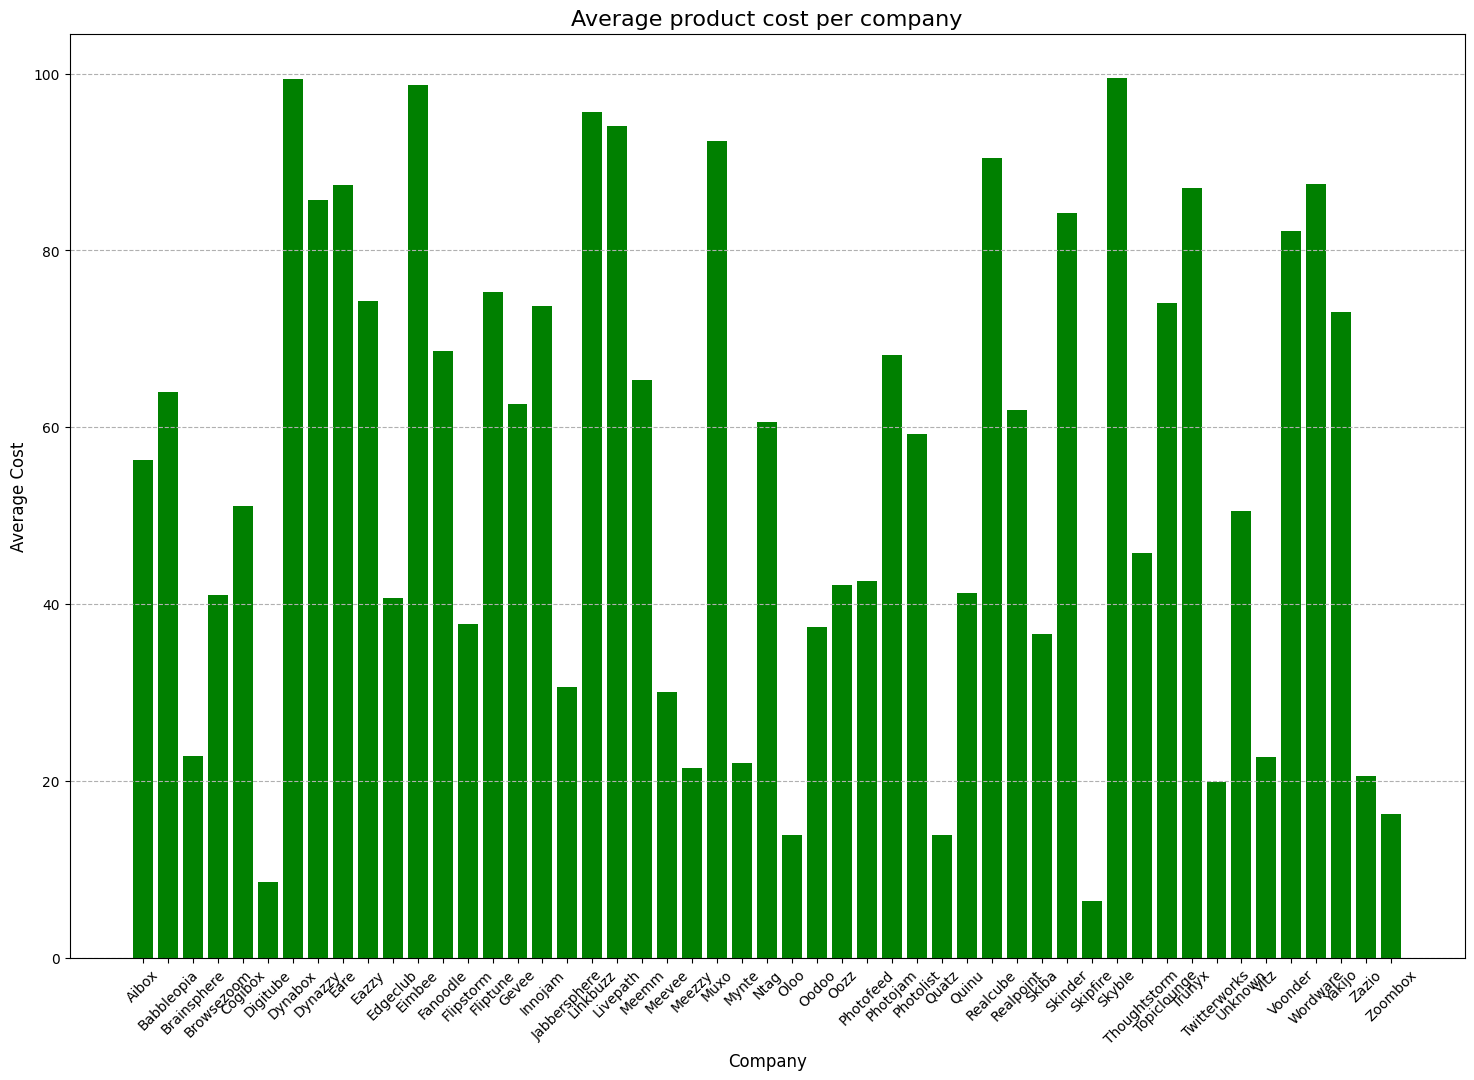

In [55]:
plt.figure(figsize=(18, 12))
plt.bar(avg_cost_per_company['company'], avg_cost_per_company['cost'], color='green')
plt.title('Average product cost per company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average Cost', fontsize=12)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.8)
plt.savefig('average_product_cost_per_company.png')
plt.show()